In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
df = pd.read_csv(r"/content/Iris.csv")

In [25]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [27]:
df.duplicated().sum()

0

In [28]:
df.value_counts()

,,,,,,count
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
95,5.6,2.7,4.2,1.3,Iris-versicolor,1
97,5.7,2.9,4.2,1.3,Iris-versicolor,1
98,6.2,2.9,4.3,1.3,Iris-versicolor,1
99,5.1,2.5,3.0,1.1,Iris-versicolor,1
...,...,...,...,...,...,...
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
52,6.4,3.2,4.5,1.5,Iris-versicolor,1
53,6.9,3.1,4.9,1.5,Iris-versicolor,1


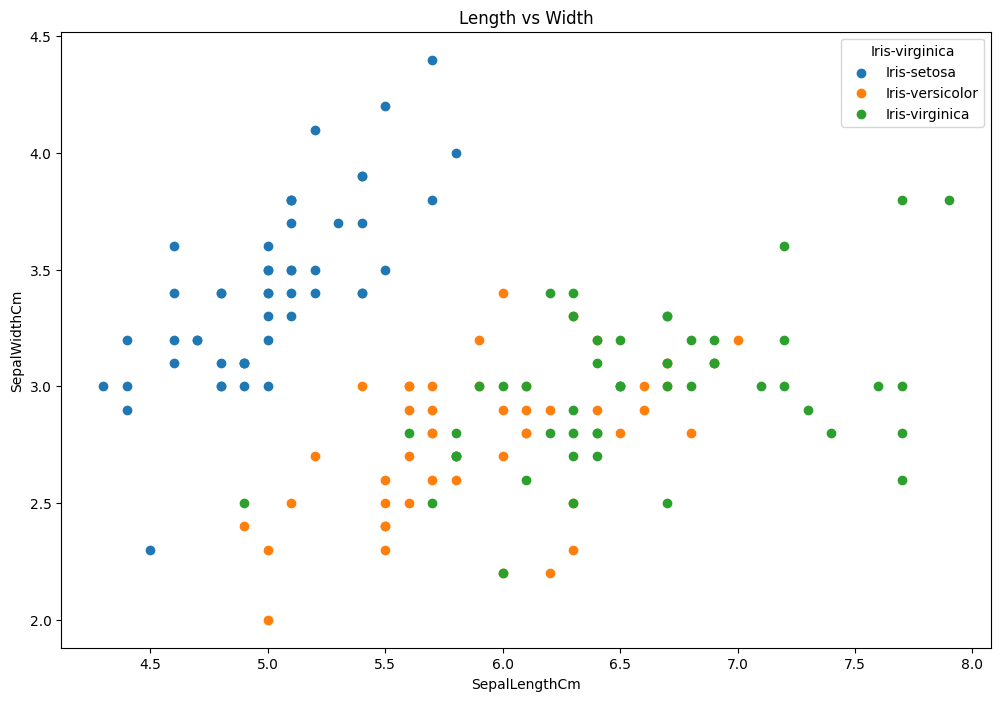

In [29]:
plt.figure(figsize=(12,8))
for Species, Species_df in df.groupby('Species'):
    plt.scatter(Species_df['SepalLengthCm'],Species_df['SepalWidthCm'],label=Species)

plt.title('Length vs Width')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(title=Species)
plt.show()

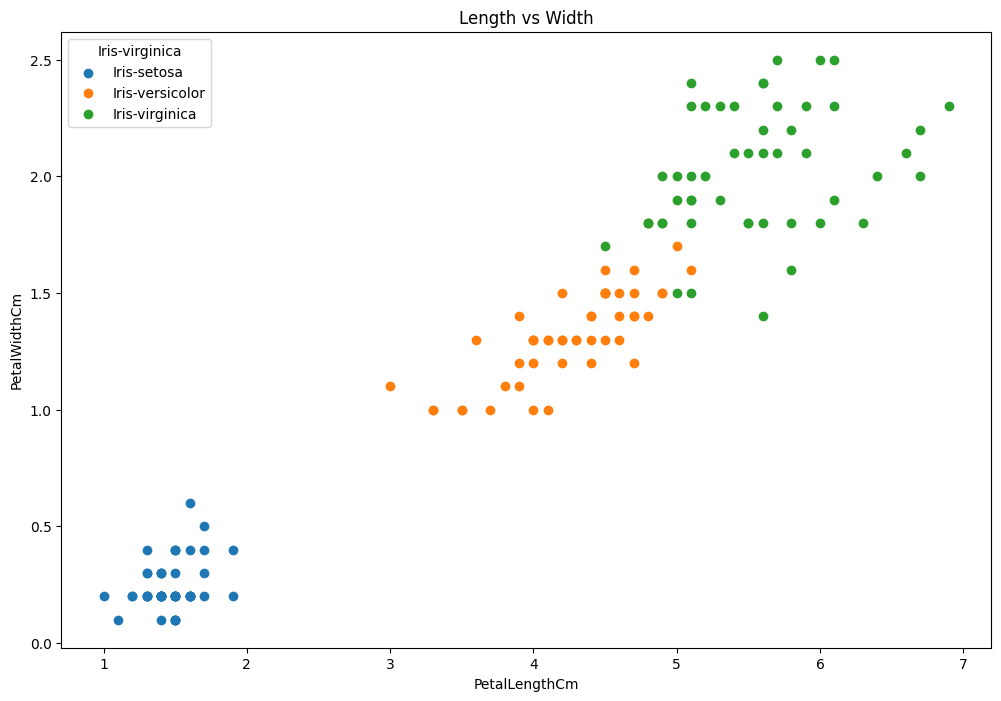

In [30]:
plt.figure(figsize=(12,8))
for Species, Species_df in df.groupby('Species'):
    plt.scatter(Species_df['PetalLengthCm'],Species_df['PetalWidthCm'],label=Species)

plt.title('Length vs Width')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(title=Species)
plt.show()

In [31]:
x = df.drop('Species', axis=1)
y = df['Species']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [44]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
rf_y_pred = rf_clf.predict(x_test)

In [46]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [49]:
clf = DecisionTreeClassifier()

In [50]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(x_test)

In [52]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [56]:
pip install catboost

In [57]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)

catboost_model.fit(x_train, y_train)

y_test_pred = catboost_model.predict(x_test)


test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")

y_train_pred = catboost_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Test Accuracy: 1.00
Training Accuracy: 1.00
